In [1]:
%pip install seaborn
%pip install folium

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

<ipython-input-2-b6dc58e0108d>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
#Dataset
#Historical Wildfires

#This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found here.

#Variables

#Region: the 7 regions
#Date: in UTC and provide the data for 24 hours ahead
#Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
#Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
#Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
#Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
#Std_confidence: standard deviation of estimated fire radiative power in megawatts
#Var_confidence: Variance of estimated fire radiative power in megawatts
#Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
#Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations

In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(text)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [5]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [6]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [7]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [8]:
#verify the columns again
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

In [11]:
### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>(use pandas to plot)


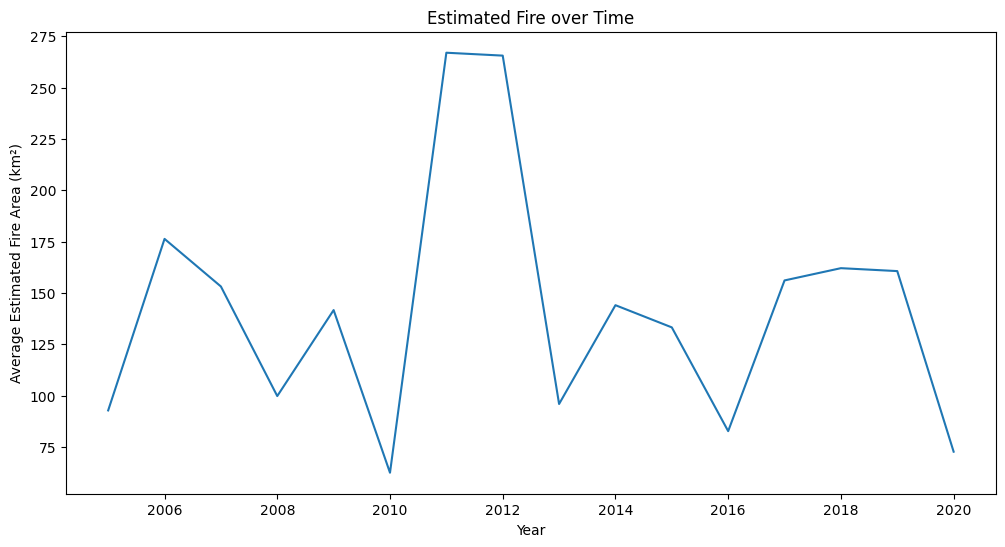

In [12]:
plt.figure(figsize=(12, 6))
#grouping data by 'Year' and calculating the mean of 'Estimated fire area'
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
#plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire over Time')
plt.show()
           

In [13]:
###TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.¶


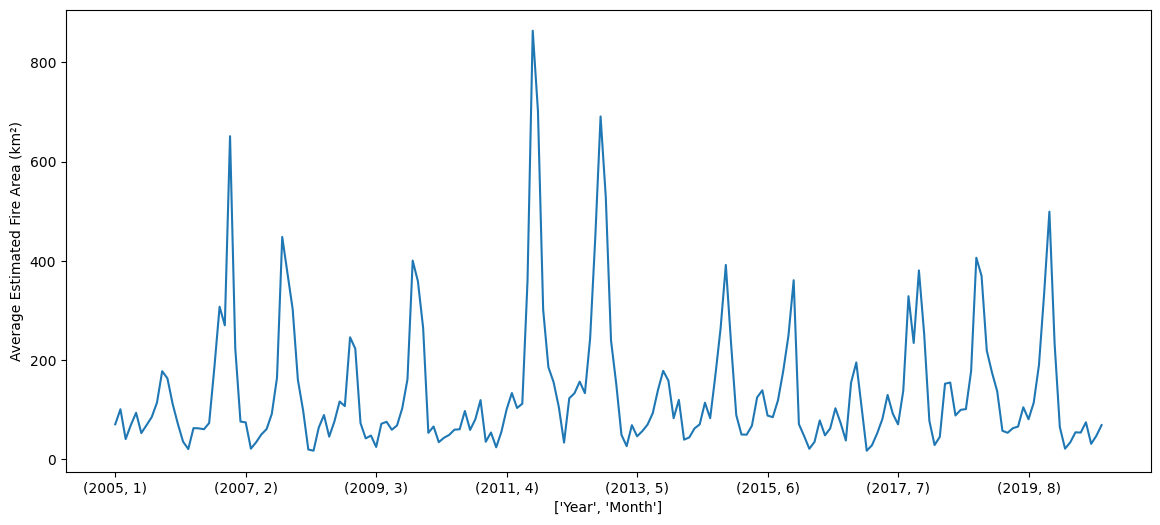

In [14]:
plt.figure(figsize=(14,6))
#grouping the data by year and month for estimated fire area
df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
#plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel(['Year','Month'])
plt.ylabel('Average Estimated Fire Area (km²)')
plt.show()

In [15]:
###TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions
###use the functionality of seaborn to develop a barplot

In [16]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

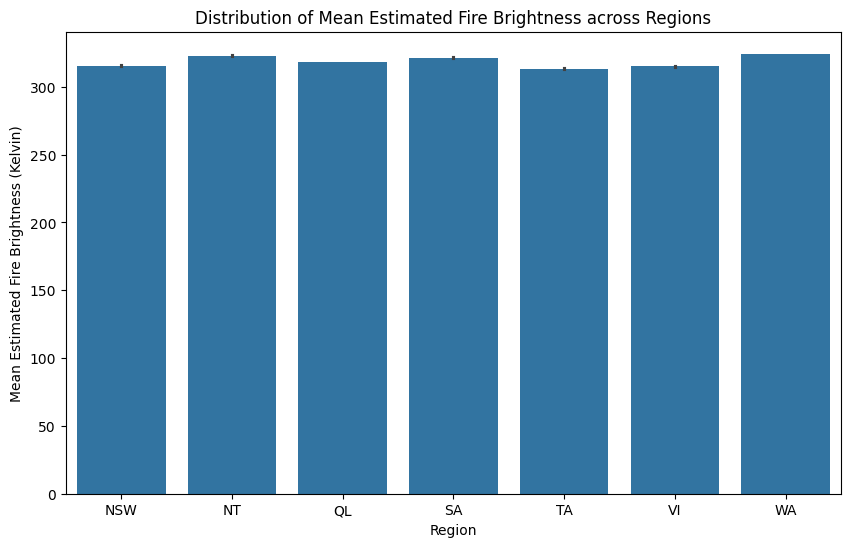

In [17]:
#creating a bar plot using seaborn to visualize the distribution of mean estimated fire brightness across regions
plt.figure(figsize=(10,6))
#using seaoarn barplot function to create the plot
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

In [18]:
##TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions
##we will develop a pie chart for this

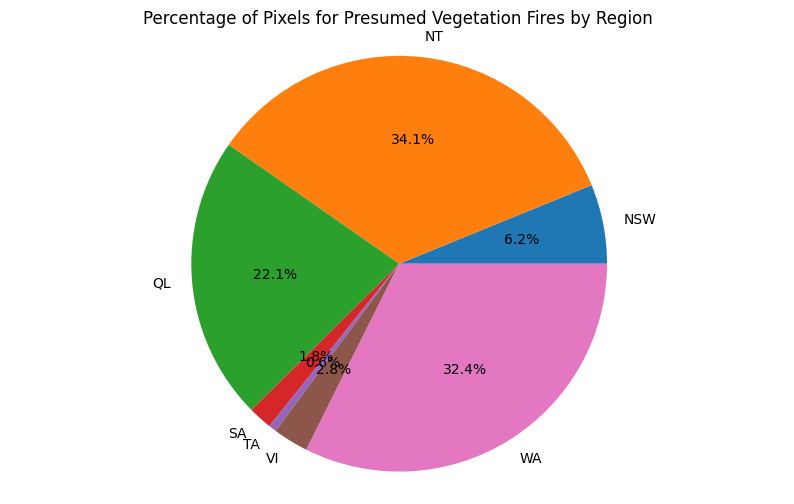

In [19]:
# Creating a pie chart to visualize the portion of count of pixels for presumed vegetation fires across regions
plt.figure(figsize=(10, 6))
# Grouping the data by region and summing the counts
region_counts = df.groupby('Region')['Count'].sum()
# Creating the pie chart using plt.pie function
# Labels are set to the region names, and autopct is used to display percentage
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()

In [20]:
#TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI
#remove the autopct from pie function and pass the following to plt.legend() after plt.title()
#[(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]

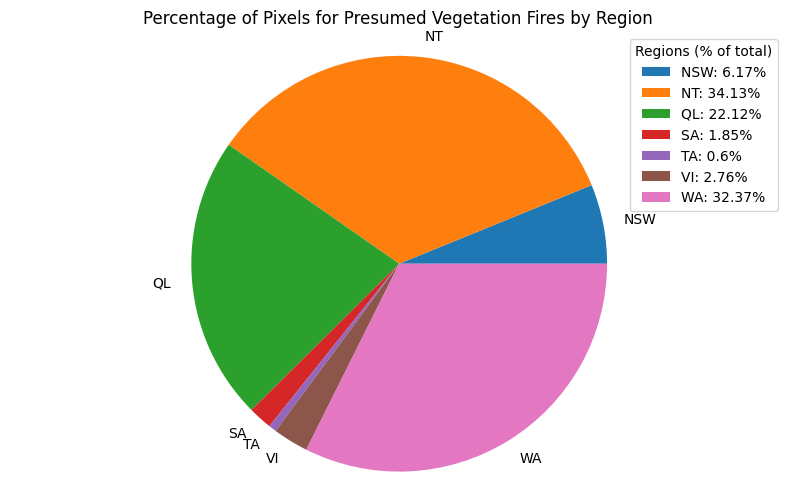

In [21]:
# Creating a pie chart to visualize the portion of count of pixels for presumed vegetation fires across regions
plt.figure(figsize=(10, 6))
# Grouping the data by region and summing the counts
region_counts = df.groupby('Region')['Count'].sum()
# Creating the pie chart using plt.pie function
# Labels are set to the region names, and autopct is used to display percentage
plt.pie(region_counts, labels=region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
#passing the plt.legend
plt.legend( 
    [f"{i}: {round(k/region_counts.sum()*100,2)}%" for i, k in zip(region_counts.index, region_counts)],
    title="Regions (% of total)",
    loc="best"
)
plt.axis('equal')
plt.show()

In [22]:
#TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness#
#Using Matplotlib to create the histogram

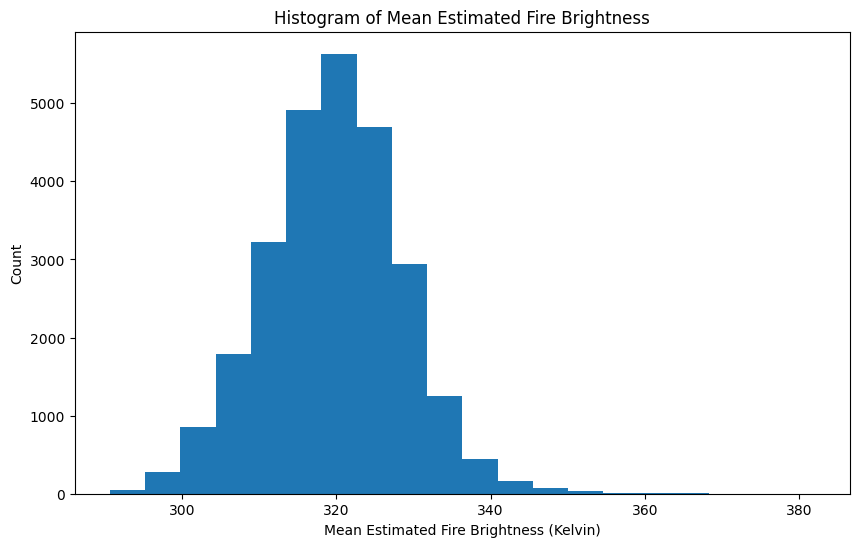

In [23]:
# Creating a histogram to visualize the distribution of mean estimated fire brightness
plt.figure(figsize=(10, 6))
# Using plt.hist to create the histogram
# Setting the number of bins to 20 for better visualization
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

In [24]:
#TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and pass region as hue


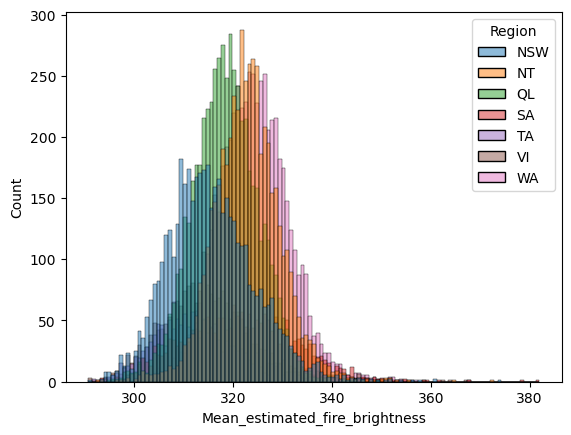

In [25]:
# Creating a histogram to visualize the distribution of mean estimated fire brightness across regions using Seaborn
# Using sns.histplot to create the histogram
# Specifying the DataFrame (data=df) and the column for the x-axis (x='Mean_estimated_fire_brightness')
# Adding hue='Region' to differentiate the distribution across regions
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

In [26]:
#looks better!, now include the parameter multiple='stack' in the histplot() and see the difference. Include labels and titles as well


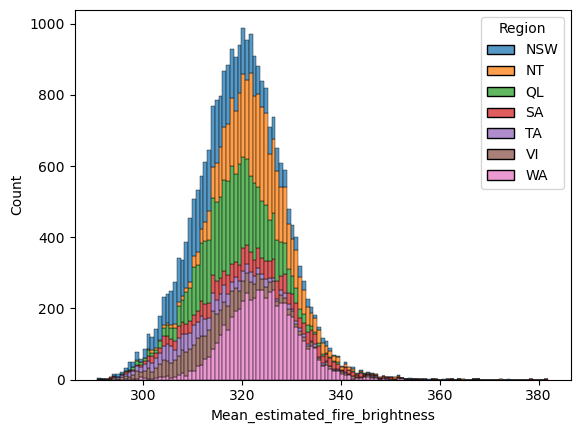

In [27]:
# Creating a stacked histogram to visualize the distribution of mean estimated fire brightness across regions using Seaborn
# Using sns.histplot to create the stacked histogram
# Specifying the DataFrame (data=df) and the column for the x-axis (x='Mean_estimated_fire_brightness')
# Adding hue='Region' to differentiate the distribution across regions
# Setting multiple='stack' to stack the histograms for different regions
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

In [28]:
#TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


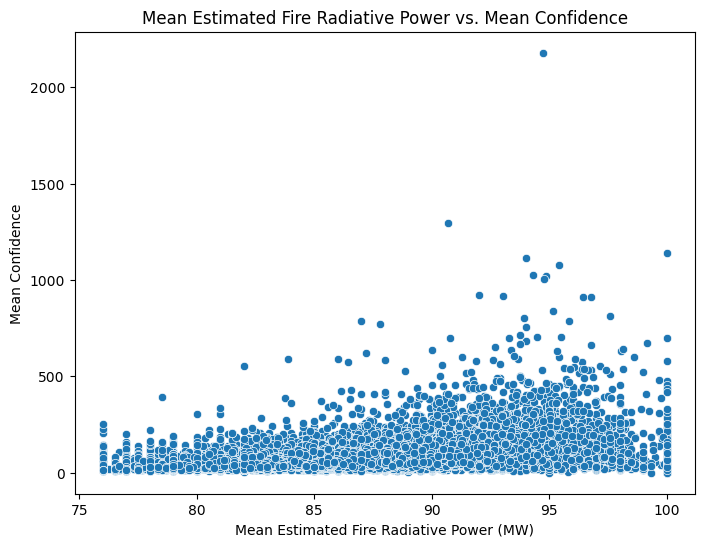

In [29]:
    # Creating a scatter plot to visualize the relationship between mean estimated fire radiative power and mean  confidence using Seaborn
    plt.figure(figsize=(8, 6))
    # Using sns.scatterplot to create the scatter plot
    # Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis            (y='Mean_estimated_fire_radiative_power')
    sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
    plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
    plt.ylabel('Mean Confidence')
    plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
    plt.show()

In [30]:
#TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium

#we have created a dataframe for containing the regions, their latitudes and longitudes.
#For australia use [-25, 135] as location to create the map

In [31]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964
